**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [61]:
# Write your code here
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [62]:
import itertools
from Productioneconomy import ProductionEconomyClass

model = ProductionEconomyClass()

par = model.par

p_range = np.linspace(0.1, 2.0, 10)

eps_1 = []
eps_2 = []
eps_3 = []

# We calculate the deviations for all combinations of p1 and p2
for p1 in p_range:
    for p2 in p_range:
        eps1, eps2, eps3 = model.check_market_clearing(p1, p2)
        eps_1.append(eps1)
        eps_2.append(eps2)
        eps_3.append(eps3)

print("Errors in market clearing conditions:")
# Adjusted printing to account for all combinations
for i, (p1, p2) in enumerate(itertools.product(p_range, repeat=2)):
    print(f"p1 = {p1:7.4f}, p2 = {p2:7.4f}, ε1 = {eps_1[i]:7.4f}, ε2 = {eps_2[i]:7.4f}, ε3 = {eps_3[i]:7.4f}")

Errors in market clearing conditions:
p1 =  0.1000, p2 =  0.1000, ε1 = -0.9933, ε2 =  2.9600, ε3 =  6.9734
p1 =  0.1000, p2 =  0.3111, ε1 = -0.9645, ε2 =  3.0036, ε3 =  2.1347
p1 =  0.1000, p2 =  0.5222, ε1 = -0.9063, ε2 =  3.0930, ε3 =  1.1432
p1 =  0.1000, p2 =  0.7333, ε1 = -0.8194, ε2 =  3.2300, ε3 =  0.6770
p1 =  0.1000, p2 =  0.9444, ε1 = -0.7047, ε2 =  3.4171, ε3 =  0.3844
p1 =  0.1000, p2 =  1.1556, ε1 = -0.5632, ε2 =  3.6576, ε3 =  0.1709
p1 =  0.1000, p2 =  1.3667, ε1 = -0.3961, ε2 =  3.9548, ε3 =  0.0004
p1 =  0.1000, p2 =  1.5778, ε1 = -0.2044, ε2 =  4.3124, ε3 = -0.1437
p1 =  0.1000, p2 =  1.7889, ε1 =  0.0106, ε2 =  4.7334, ε3 = -0.2705
p1 =  0.1000, p2 =  2.0000, ε1 =  0.2481, ε2 =  5.2208, ε3 = -0.3851
p1 =  0.3111, p2 =  0.1000, ε1 = -0.9645, ε2 =  0.8260, ε3 =  7.0751
p1 =  0.3111, p2 =  0.3111, ε1 = -0.9357, ε2 =  0.8401, ε3 =  2.1676
p1 =  0.3111, p2 =  0.5222, ε1 = -0.8778, ε2 =  0.8690, ε3 =  1.1631
p1 =  0.3111, p2 =  0.7333, ε1 = -0.7912, ε2 =  0.9133, ε3 =  0.6

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [63]:
p1_opt, p2_opt = model.find_market_equilibrium()
print(f"Optimal p1: {p1_opt:.4f}, Optimal p2: {p2_opt:.4f}")


Optimal p1: 0.9759, Optimal p2: 1.4908


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [64]:
initial_tau = 0.0
bounds = [(0, 1)]

result = minimize(model.negative_swf, initial_tau, bounds=bounds, method='Nelder-Mead')

optimal_tau = result.x[0]
model.par.tau = optimal_tau
p1_opt, p2_opt = model.find_market_equilibrium()
optimal_swf = model.swf(p1_opt, p2_opt)

print(f"Best Tau: {optimal_tau:.4f}, Optimal p1: {p1_opt:.4f}, Optimal p2: {p2_opt:.4f}, Highest Social Welfare: {optimal_swf:.4f}")

Best Tau: 0.1715, Optimal p1: 1.0138, Optimal p2: 1.4653, Highest Social Welfare: -0.6615


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [65]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [66]:
# write your answer here

results = []

# Iterate over each v in v
for v in par.v:
    # Initialize an empty list to store the results of the current experiment
    experiment_results = []
    # Perform the experiment 10000 times for each v
    for _ in range(10000):
        # Generate epsilon from a normal distribution with mean 0 and standard deviation sigma
        epsilon = np.random.normal(0, par.sigma)
        # Calculate u
        u = v + epsilon
        # Append the result to the experiment_results list
        experiment_results.append(u)
    # Calculate the mean of the experiment_results list and append it to the results list
    results.append(np.mean(experiment_results))

print(", ".join([f"{result:.4f}" for result in results]))

1.0046, 2.0209, 2.9815


We observe that the first, second and thrid career path resectively gives expected utility 1, 2 and 3, corresponding to $v_1=1, v_2=2,v_3=3$. This makes sense since the mean of $\epsilon^k_{i,j}$ is $0$. 

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

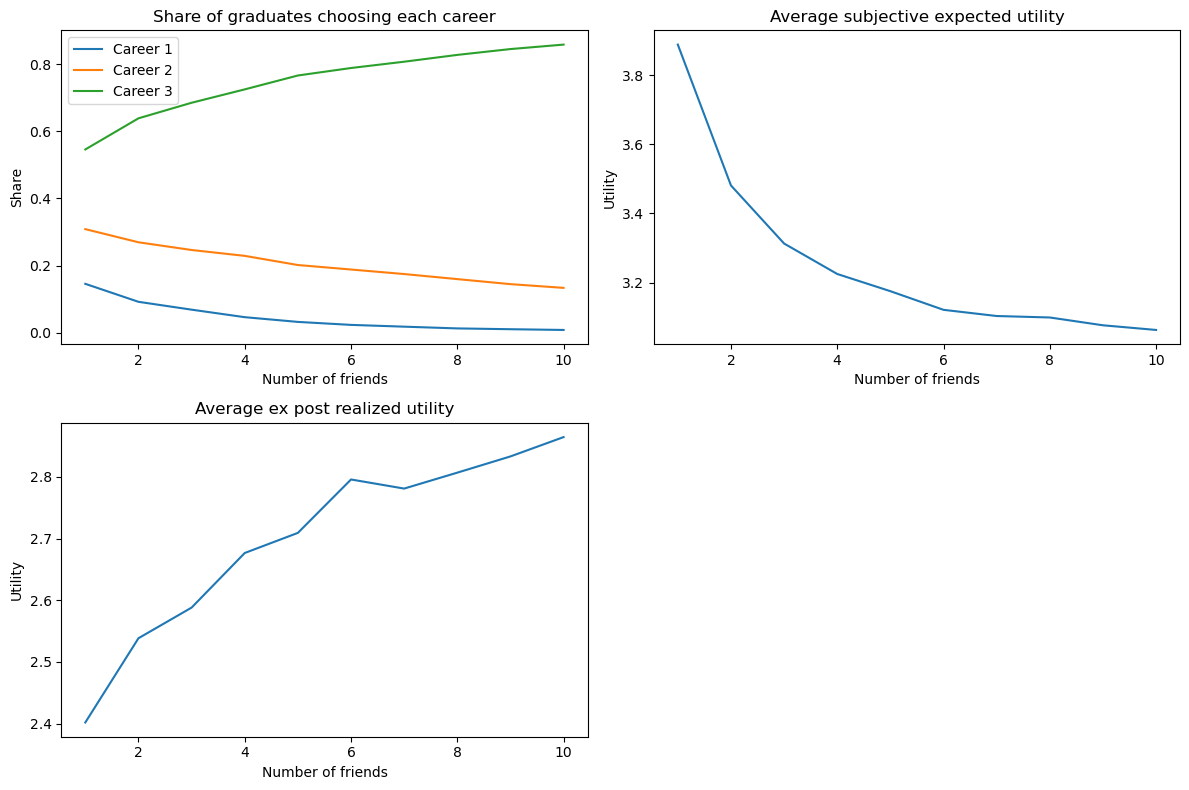

In [67]:
# Write your answer here 
import matplotlib.pyplot as plt

# Initialize arrays to store the results
chosen_careers = np.zeros((par.N, par.K))
expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# For each graduate
for i in range(par.N):
    # For each simulation
    for k in range(par.K):
        # Calculate the expected utility of each career track
        expected_utilities_i = np.zeros(par.J)
        for j in range(par.J):
            epsilon_friends = np.random.normal(0, par.sigma, size=(i+1))
            expected_utilities_i[j] = np.mean(par.v[j] + epsilon_friends)
        # Choose the career track with the highest expected utility
        chosen_career = np.argmax(expected_utilities_i)
        chosen_careers[i, k] = chosen_career
        expected_utilities[i, k] = expected_utilities_i[chosen_career]
        # Calculate the realized utility of the chosen career track
        epsilon_self = np.random.normal(0, par.sigma)
        realized_utilities[i, k] = par.v[chosen_career] + epsilon_self

# Calculate the share of graduates choosing each career
career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(chosen_careers[i] == j)

# Calculate the average subjective expected utility and the average ex post realized utility
average_expected_utilities = np.mean(expected_utilities, axis=1)
average_realized_utilities = np.mean(realized_utilities, axis=1)

# Visualize the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, par.N+1), career_shares)
plt.title('Share of graduates choosing each career')
plt.xlabel('Number of friends')
plt.ylabel('Share')
plt.legend(['Career 1', 'Career 2', 'Career 3'])

plt.subplot(2, 2, 2)
plt.plot(range(1, par.N+1), average_expected_utilities)
plt.title('Average subjective expected utility')
plt.xlabel('Number of friends')
plt.ylabel('Utility')

plt.subplot(2, 2, 3)
plt.plot(range(1, par.N+1), average_realized_utilities)
plt.title('Average ex post realized utility')
plt.xlabel('Number of friends')
plt.ylabel('Utility')

plt.tight_layout()
plt.show()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

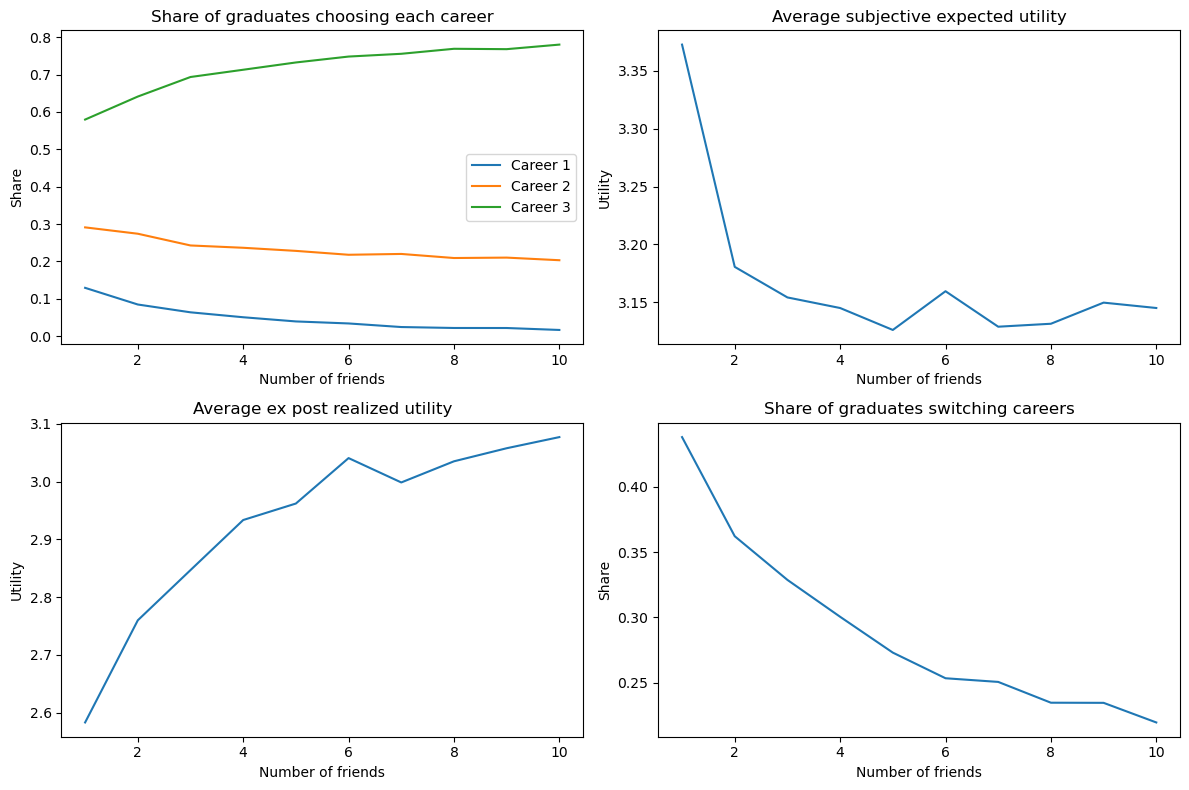

In [68]:
# Initialize arrays to store the results
new_chosen_careers = np.zeros((par.N, par.K))
new_expected_utilities = np.zeros((par.N, par.K))
new_realized_utilities = np.zeros((par.N, par.K))
switches = np.zeros((par.N, par.K))

# For each graduate
for i in range(par.N):
    # For each simulation
    for k in range(par.K):
        # Calculate the new priors for each career track
        new_priors = np.zeros(par.J)
        for j in range(par.J):
            if j == chosen_careers[i, k]:
                new_priors[j] = realized_utilities[i, k]
            else:
                epsilon_friends = np.random.normal(0, par.sigma, size=(i+1))
                new_priors[j] = np.mean(par.v[j] + epsilon_friends) - par.c
        # Choose the career track with the highest new prior
        new_chosen_career = np.argmax(new_priors)
        new_chosen_careers[i, k] = new_chosen_career
        new_expected_utilities[i, k] = new_priors[new_chosen_career]
        # Calculate the realized utility of the new chosen career track
        if new_chosen_career == chosen_careers[i, k]:
            new_realized_utilities[i, k] = realized_utilities[i, k]
        else:
            epsilon_self = np.random.normal(0, par.sigma)
            new_realized_utilities[i, k] = par.v[new_chosen_career] + epsilon_self - par.c
        # Record whether the graduate chose to switch careers
        switches[i, k] = new_chosen_career != chosen_careers[i, k]

# Calculate the share of graduates choosing each career
new_career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        new_career_shares[i, j] = np.mean(new_chosen_careers[i] == j)

# Calculate the average subjective expected utility and the average ex post realized utility
new_average_expected_utilities = np.mean(new_expected_utilities, axis=1)
new_average_realized_utilities = np.mean(new_realized_utilities, axis=1)

# Calculate the share of graduates that chooses to switch careers
switch_shares = np.mean(switches, axis=1)

# Visualize the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, par.N+1), new_career_shares)
plt.title('Share of graduates choosing each career')
plt.xlabel('Number of friends')
plt.ylabel('Share')
plt.legend(['Career 1', 'Career 2', 'Career 3'])

plt.subplot(2, 2, 2)
plt.plot(range(1, par.N+1), new_average_expected_utilities)
plt.title('Average subjective expected utility')
plt.xlabel('Number of friends')
plt.ylabel('Utility')

plt.subplot(2, 2, 3)
plt.plot(range(1, par.N+1), new_average_realized_utilities)
plt.title('Average ex post realized utility')
plt.xlabel('Number of friends')
plt.ylabel('Utility')

plt.subplot(2, 2, 4)
plt.plot(range(1, par.N+1), switch_shares)
plt.title('Share of graduates switching careers')
plt.xlabel('Number of friends')
plt.ylabel('Share')

plt.tight_layout()
plt.show()

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [69]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

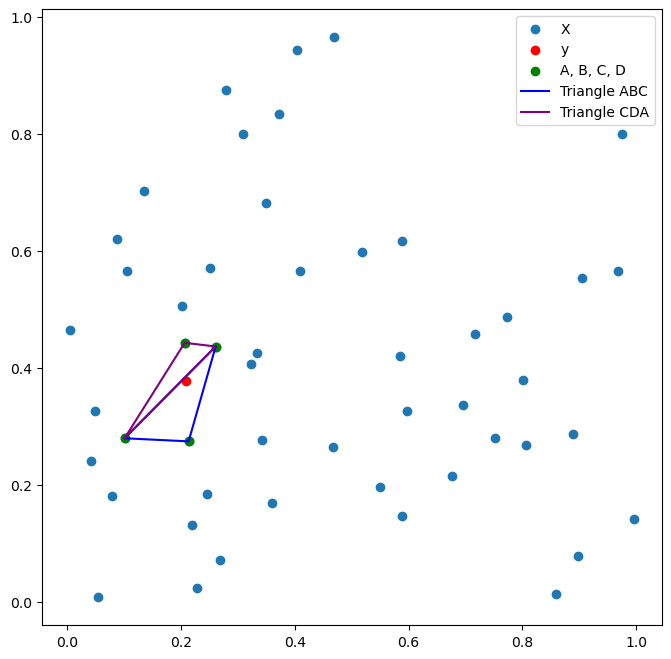

In [70]:
# write your answer here

# Define a function to calculate the Euclidean distance between two points
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Initialize the points A, B, C, and D
A = B = C = D = None
min_dist_A = min_dist_B = min_dist_C = min_dist_D = np.inf

# Find the points A, B, C, and D
for x in X:
    dist = euclidean_distance(x, y)
    if x[0] > y[0] and x[1] > y[1] and dist < min_dist_A:
        A = x
        min_dist_A = dist
    elif x[0] > y[0] and x[1] < y[1] and dist < min_dist_B:
        B = x
        min_dist_B = dist
    elif x[0] < y[0] and x[1] < y[1] and dist < min_dist_C:
        C = x
        min_dist_C = dist
    elif x[0] < y[0] and x[1] > y[1] and dist < min_dist_D:
        D = x
        min_dist_D = dist

# Plot the points and the triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='X')
plt.scatter(y[0], y[1], color='red', label='y')
plt.scatter([A[0], B[0], C[0], D[0]], [A[1], B[1], C[1], D[1]], color='green', label='A, B, C, D')
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='blue', label='Triangle ABC')
plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='purple', label='Triangle CDA')
plt.legend()
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [71]:
# write your answer here
def barycentric_coords(A, B, C, y):
    denom = ((B[1] - C[1])*(A[0] - C[0]) + (C[0] - B[0])*(A[1] - C[1]))
    r1 = ((B[1] - C[1])*(y[0] - C[0]) + (C[0] - B[0])*(y[1] - C[1])) / denom
    r2 = ((C[1] - A[1])*(y[0] - C[0]) + (A[0] - C[0])*(y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Calculate the barycentric coordinates of y with respect to triangles ABC and CDA
r_ABC = barycentric_coords(A, B, C, y)
r_CDA = barycentric_coords(C, D, A, y)

# Check which triangle y is inside
inside_ABC = all(0 <= r <= 1 for r in r_ABC)
inside_CDA = all(0 <= r <= 1 for r in r_CDA)

if inside_ABC:
    print("y is inside triangle ABC")
elif inside_CDA:
    print("y is inside triangle CDA")
else:
    print("y is not inside either triangle")

y is inside triangle ABC


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [72]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [73]:
# write your answer here

# Calculate the values of f at the points A, B, C, and D
f_A = f(A)
f_B = f(B)
f_C = f(C)
f_D = f(D)

# Calculate the true value of f at the point y
f_y_true = f(y)

# Calculate the approximation of f at the point y using the barycentric coordinates
if inside_ABC:
    f_y_approx = r_ABC[0]*f_A + r_ABC[1]*f_B + r_ABC[2]*f_C
elif inside_CDA:
    f_y_approx = r_CDA[0]*f_C + r_CDA[1]*f_D + r_CDA[2]*f_A
else:
    f_y_approx = np.nan

# Compare the true value and the approximation
print("True value of f(y):", f_y_true)
print("Approximation of f(y):", f_y_approx)

True value of f(y): 0.0789565216259594
Approximation of f(y): 0.08405201731052576


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [74]:
Y = [(0.2,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [75]:
# Loop over each point in the vector
for y in Y:
    y = np.array(y)
    # Calculate the true value of f at the point y
    f_y_true = f(y)

    # Calculate the barycentric coordinates of y with respect to triangles ABC and CDA
    r_ABC = barycentric_coords(A, B, C, y)
    r_CDA = barycentric_coords(C, D, A, y)

    # Check which triangle y is inside
    inside_ABC = all(0 <= r <= 1 for r in r_ABC)
    inside_CDA = all(0 <= r <= 1 for r in r_CDA)

    # Calculate the approximation of f at the point y using the barycentric coordinates
    if inside_ABC:
        f_y_approx = r_ABC[0]*f_A + r_ABC[1]*f_B + r_ABC[2]*f_C
    elif inside_CDA:
        f_y_approx = r_CDA[0]*f_C + r_CDA[1]*f_D + r_CDA[2]*f_A
    else:
        f_y_approx = np.nan

    # Compare the true value and the approximation
    print("For point", y)
    print("True value of f(y):", f_y_true)
    print("Approximation of f(y):", f_y_approx)

For point [0.2 0.2]
True value of f(y): 0.04000000000000001
Approximation of f(y): nan
For point [0.8 0.8]
True value of f(y): 0.6400000000000001
Approximation of f(y): nan
For point [0.8 0.2]
True value of f(y): 0.16000000000000003
Approximation of f(y): nan
For point [0.5 0.5]
True value of f(y): 0.25
Approximation of f(y): nan
